## 1. Pytorch Basic


### 1.1. Pytorch import

In [33]:
import torch

In [34]:
print(torch.__version__)

1.10.0+cu111


### 1.2. Pytorch sneak peek

In [35]:
import numpy as np
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [36]:
#MNIST dataset download
train_data = datasets.MNIST(root = "data", train = True, download = True, transform = ToTensor())
test_data = datasets.MNIST(root = "data", train = False, download = True, transform = ToTensor())

In [37]:
#Set batch size
batch_size = 64

#Set dataloader
train_dataloader = DataLoader(train_data, batch_size = batch_size)
test_dataloader = DataLoader(test_data, batch_size = batch_size)

#Confirm
for X, y in test_dataloader:
    print("Shape of X [N, C, H, W]: ", X.shape)
    print("Shape of y: ", y.shape)
    break

Shape of X [N, C, H, W]:  torch.Size([64, 1, 28, 28])
Shape of y:  torch.Size([64])


In [38]:
#Get GPU or CPU
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

Using cuda device


In [39]:
#Set Model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [40]:
#Set Loss function, optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3)

In [41]:
len(train_dataloader.dataset)

60000

In [42]:
#Define function for training
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        #Calculate loss
        pred = model(X)
        loss = loss_fn(pred, y)

        #Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}    [{current:>5d}/{size:>5d}]")

#Define function for test
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss = loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
        test_loss /= num_batches
        correct /= size
        print(f"Test Error: \n Accuracy: {(100 * correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [43]:
#Training
epochs = 10
for t in range(epochs):
    print(f"Epoch {t + 1}\n ----------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
 ----------------------------------
loss: 2.313183    [    0/60000]
loss: 0.502830    [ 6400/60000]
loss: 0.292958    [12800/60000]
loss: 0.401551    [19200/60000]
loss: 0.267273    [25600/60000]
loss: 0.338681    [32000/60000]
loss: 0.162210    [38400/60000]
loss: 0.343527    [44800/60000]
loss: 0.289648    [51200/60000]
loss: 0.327219    [57600/60000]
Test Error: 
 Accuracy: 93.9%, Avg loss: 0.000513 

Epoch 2
 ----------------------------------
loss: 0.149147    [    0/60000]
loss: 0.190234    [ 6400/60000]
loss: 0.106685    [12800/60000]
loss: 0.193552    [19200/60000]
loss: 0.156662    [25600/60000]
loss: 0.245390    [32000/60000]
loss: 0.077120    [38400/60000]
loss: 0.253082    [44800/60000]
loss: 0.185872    [51200/60000]
loss: 0.223239    [57600/60000]
Test Error: 
 Accuracy: 96.1%, Avg loss: 0.000169 

Epoch 3
 ----------------------------------
loss: 0.102374    [    0/60000]
loss: 0.131363    [ 6400/60000]
loss: 0.079185    [12800/60000]
loss: 0.086692    [19200/600

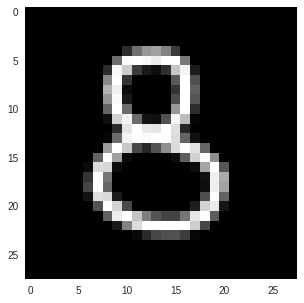

In [44]:
import os
from PIL import Image

#Input new test image

#Set path of image file
cur_dir = os.getcwd()
img_path = os.path.join(cur_dir, "image.png")

#Read image file
cur_img = Image.open(img_path)

#Resize
cur_img = cur_img.resize((28, 28))
image = np.asarray(cur_img)

#If image channel is RGB, change it to gray scale
try:
    image = np.mean(image , axis = 2)
except:
    pass

#Change to black background and white character like MNIST data
image = np.abs(255 - image)

#Normalization
image = image.astype(np.float32) / 255.

#Confirm
plt.figure(figsize = (5, 5))
plt.imshow(image, cmap = "gray")
plt.grid(False)
plt.show()

In [45]:
#Predict
image = torch.as_tensor(image).to(device).reshape(1, 1, 28, 28)
model.eval()
predict = model(image)

print("Model이 예측한 값은 {} 입니다.".format(predict.argmax(1).item()))

Model이 예측한 값은 8 입니다.
